In [97]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.impute import SimpleImputer

In [98]:
file_data = 'VideoGamesSales.csv'
df = pd.read_csv (file_data, sep=',')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


En este dataset tenemos datos de aproximadamente 17 mil juegos. Su año de lanzamiento, plataforma en la que fue lanzado y su genero. Tambien tenemos el puntaje sobre el volumen de ventas en las regiones mas relevante (NA, EU y Japon), como tambien asi, su puntaje global. Tenemos el puntaje que les ha dado la pagina Metacritic, con un maximo de 100 puntos, y el puntaje dados por los usuarios, con un tope de 10 puntos. Podria utilizarse para que los desarrolladores puedan tener una idea sobre que direccion tomar, a la hora de lanzar algun producto a su mercado. Ya sea que genero elegir, que plataforma es la mas elegida para ese genero, o en que region basar su marketing de ventas.

Este dataset nos podria ayudar a responder:
-Cuanta influencia tiene en el volumen de ventas, la fecha de lanzamiento de un juego.
-Si existe algun genero que tenga mas volumen de ventas en una region y en otra no, y viceversa.
-Si las criticas o los puntajes dados por los usuarios estan directamente relacionados con los puntajes de venta
-Podriamos ver tambien, si las regiones tienen cierto tipo de favoritismo en cuanto a las plataformas y/o consolas



In [99]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [100]:
#Reemplazamos valores NaN en las columnas de Critic Score y User Score
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean().round(1))
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].mean().round(1))
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69.0,NaN,7.1,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69.0,NaN,7.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,69.0,NaN,7.1,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,69.0,NaN,7.1,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,69.0,NaN,7.1,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,69.0,NaN,7.1,NaN,NaN,NaN


Text(0.5, 1.0, 'Global sales by year of release')

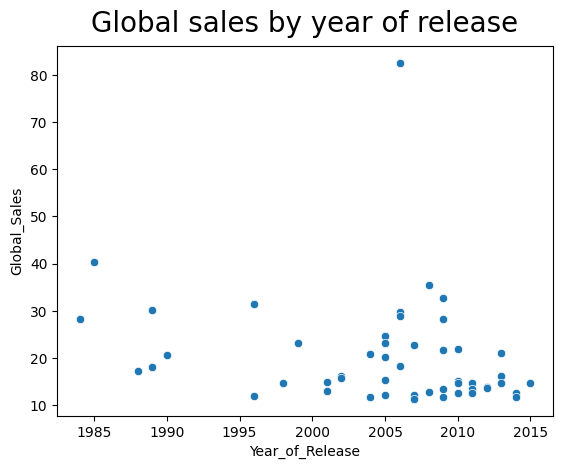

In [101]:
sns.scatterplot(data=df.head(50), x="Year_of_Release", y="Global_Sales")
plt.title("Global sales by year of release", fontsize=20, verticalalignment='bottom')

Con este grafico podemos deducir, que la fecha de lanzamiento de los juegos, no tienen ninguna incidencia en su volumen de ventas global. 

In [102]:
sales_df = df.groupby(['Year_of_Release'])['Global_Sales'].sum()
sales_df

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Global sales progression')

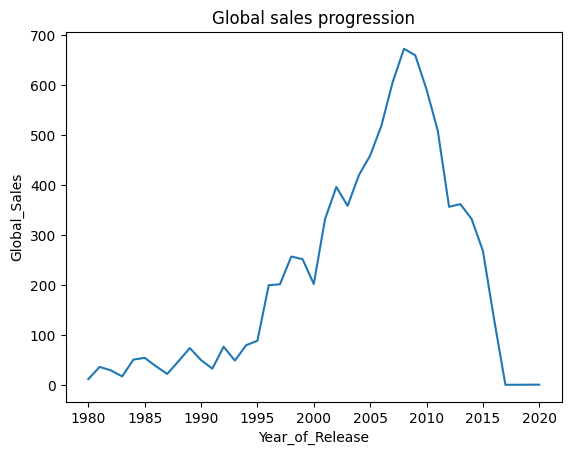

In [103]:
sns.lineplot(data=sales_df)
plt.title("Global sales progression")

En este grafico vemos como el volumen de ventas global fue creciendo hasta llegar a su pico maximo aproximadamente en el año 2008, y a partir de ese momento, tuvo una caida muy abrupta. Se podria especular, que las ventas globales podrian haber caido, debido a la aparicion de mas sitios que se dedicaban a piratear los juegos, haciendo que caigan las cifras oficiales de ventas.

In [104]:
model1 = 'Year_of_Release~Global_Sales'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Year_of_Release   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     96.65
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           9.54e-23
Time:                        20:39:20   Log-Likelihood:                -52432.
No. Observations:               16450   AIC:                         1.049e+05
Df Residuals:                   16448   BIC:                         1.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2006.6420      0.048   4.15e+04   

In [105]:
sum_df = df.groupby(['Genre'])['Global_Sales'].sum()
sum_df

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

In [106]:
df_n=df[['Genre','NA_Sales','EU_Sales','JP_Sales']].groupby(by=['Genre']).sum().reset_index()
df_n.head()

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,879.01,519.13,161.44
1,Adventure,105.26,63.54,52.30
2,Fighting,223.36,100.33,87.48
3,Misc,407.27,212.74,108.11
4,Platform,445.50,200.35,130.83


Text(0.5, 1.0, 'NA sales by genre')

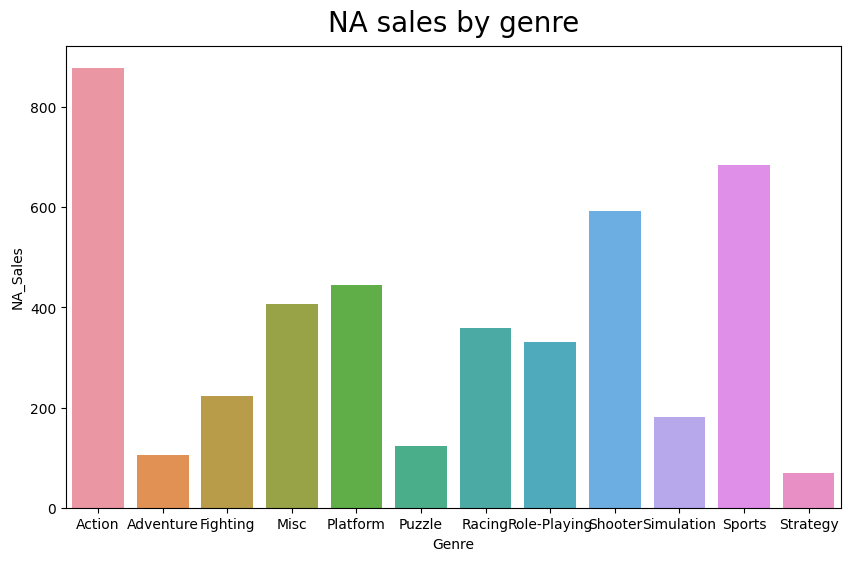

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(y='NA_Sales',x='Genre',data=df_n);
plt.title("NA sales by genre", fontsize=20, verticalalignment='bottom')


Podemos ver como en la region de Norteamerica, los 3 generos mas populares son: Accion, Deportes y Shooter. Mientras que los 3 menos populares son: Puzzle, Aventura y Estrategia.

Text(0.5, 1.0, 'EU sales by genre')

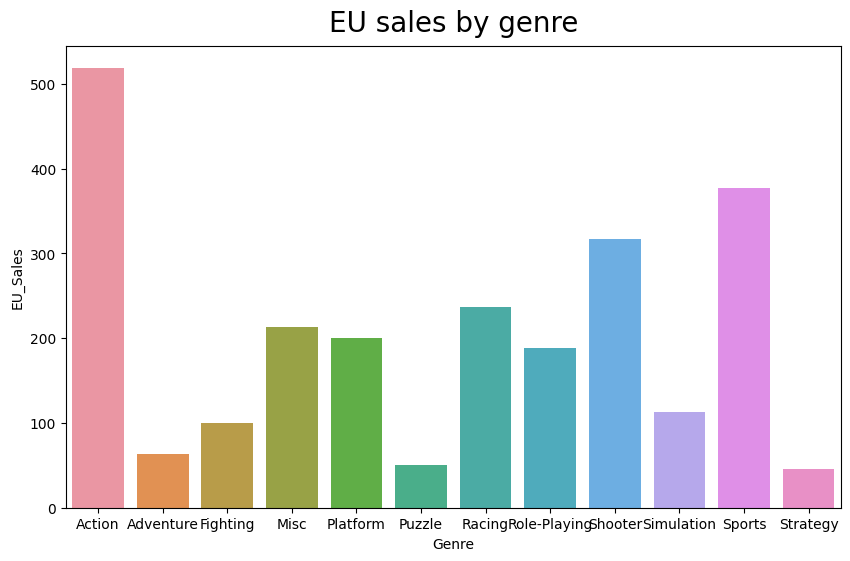

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(y='EU_Sales',x='Genre',data=df_n);
plt.title("EU sales by genre", fontsize=20, verticalalignment='bottom')

En la region de Europa, se repite casi el mismo patron que en Norteamerica. El top 3 y el bottom 3, se conforman por los mismos generos.

Text(0.5, 1.0, 'JP sales by genre')

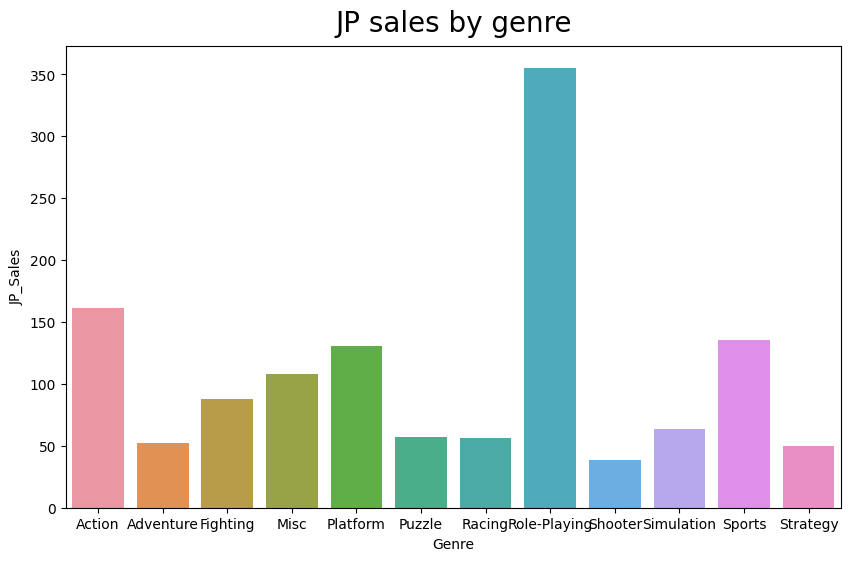

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(y='JP_Sales',x='Genre',data=df_n);
plt.title("JP sales by genre", fontsize=20, verticalalignment='bottom')

Sin embargo en la region de Japon, esto cambia. En el top 3 tenemos las categorias de: RPG, primera por amplia diferencia, Accion y Deportes. Mientras las 3 menos populares, son las mismas que en las otras regiones. 

Quizas las categorias menos populares, puedan deberse al volumen de juegos que tienen, haciendo que no puedan sumar una gran cantidad de ventas. Con esto podriamos decir, que las empresas o desarrolladores que se enfoquen en el desarrollo de juegos de RPG, podrian enfocar su campaña de marketing en la region de Japon, siendo esta la que mas juegos de esta categoria consume.

Text(0.5, 1.0, 'Critic and User score')

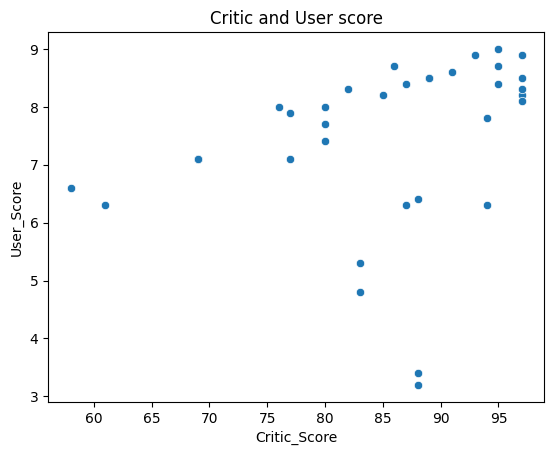

In [119]:
sns.scatterplot(data=df.head(50), x="Critic_Score", y="User_Score")
plt.title("Critic and User score")

Este grafico nos permite ver, como los usuarios generalmente coinciden con el puntaje que le dan a los juegos, con el puntaje dado por la pagina Metacritic. Vemos que, en terminos generales, estas dos variables podrian tener una relacion. NOTA: este grafico se hizo con el top de los 50 juegos mas vendidos a nivel global.

In [111]:
model2 = 'Critic_Score~User_Score'
lm2   = sm.ols(formula = model2, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           Critic_Score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5592.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:39:21   Log-Likelihood:                -59339.
No. Observations:               16719   AIC:                         1.187e+05
Df Residuals:                   16717   BIC:                         1.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7322      0.463     75.073      0.0

In [112]:
df_p=df[['Platform','NA_Sales','EU_Sales','JP_Sales']].groupby(by=['Platform']).sum().reset_index()
df_p.head()

,Platform,NA_Sales,EU_Sales,JP_Sales
0,2600,90.60,5.47,0.00
1,3DO,0.00,0.00,0.10
2,3DS,83.49,61.48,100.67
3,DC,5.43,1.69,8.56
4,DS,382.67,188.89,175.57


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

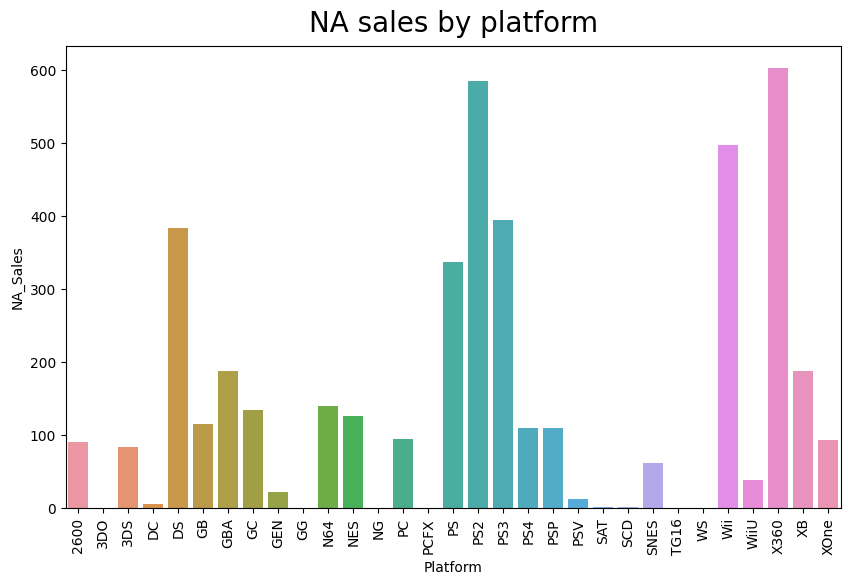

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(y='NA_Sales',x='Platform',data=df_p);
plt.title("NA sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

Vimos cuales eran los generos preferidos en cada region. Ahora vemos cuales son las plataformas predominantes de cada region. En Norteamerica las plataformas con mas volumen de ventas son: X360, PS2 y Wii.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

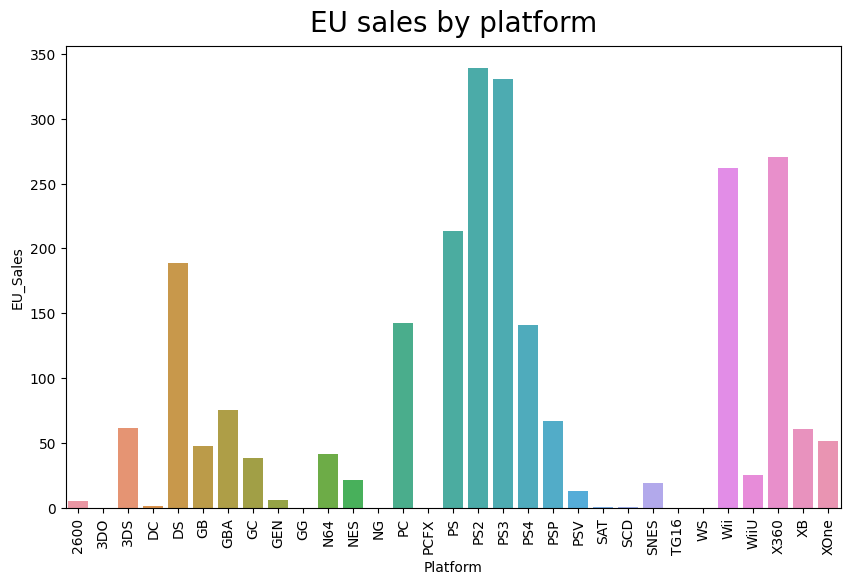

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(y='EU_Sales',x='Platform',data=df_p);
plt.title("EU sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

En Europa, la PS2 y la X360 siguen en el podio, y se suma la PS3.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

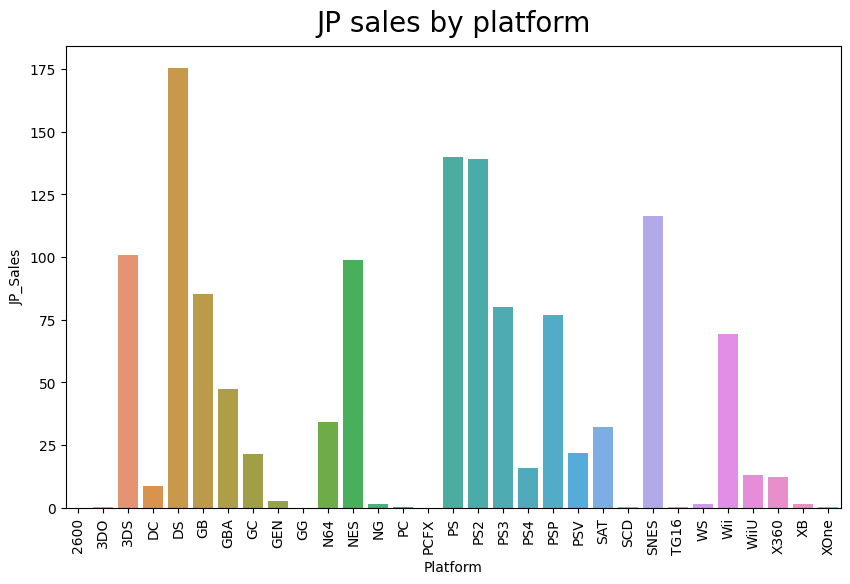

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(y='JP_Sales',x='Platform',data=df_p);
plt.title("JP sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

En Japon en cambio, la plataforma mas popular es la DS, seguida por la PS y PS2. Tambien se puede ver como la SNES, tiene mucha popularidad, mientras que en las otras regiones, casi no aparecia. Podemos ver como la PS2 esta en el podio en las 3 regiones. Por lo que creo que es la plataforma mas popular.

Se podria llegar a la conclusion en terminos de marketing, que las regiones de Norteamerica y Europa, tienen preferencias muy similares en cuanto a generos y plataformas, mientras que la region de Japon es muy diferente en cuanto a gustos de juegos.